In [212]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional
import matplotlib.pyplot as plt

# Set random seed for reproducibility
seed_value = 420
tf.random.set_seed(seed_value)
np.random.seed(seed_value)


# Step 1: Load and preprocess the data
training_data = r'C:\Users\Niranjan\Desktop\BISAG\second project\training data\training.csv'

training_dataset = pd.read_csv(training_data)
training_df = training_dataset.drop(columns=["Eqp1 Pressure2 Working","Eqp1 Temp1 Working","Eqp1 Temp2 Working","Eqp1 oil temp sensor Oil level Working",
                           "Eqp2 water flow working","Eqp2 Incoming Pressure Working","Eqp2 OutGoing Pressure Working ","Eqp2 Pressure(bar) Diff Working",
                           "Eqp2 Incoming Temp Working","Eqp2 Outgoiing Temp Working","Eqp3 cold water flow Working",
                           "Eqp3 Incoming Pressure Working","Eqp3 Variation in Pressure Working","Eqp3 Incoming Temp Working"])
training_df2 = training_df.set_index("Date and Time")

# Step 2: Define the scaling ranges
scaling_ranges = {
    'Eqp1 Load(%)': (10, 100),
    'Eqp1 Pressure1(bar)': (2.0, 3.0),
    'Eqp1 Supply Of oil Pressure(bar)': (7.0, 9.0),
    'Eqp1 oil filter variations Presssure(bar)  ': (None, 0.6),
    'Eqp1 Temp1(degree)': (5, 20),
    'Eqp1 Temp2(degree)': (50, 70),
    'Eqp1 oil temp sensor Oil level(mm)': (150, 200),
    'Eqp2 water flow(M/hr)': (90, 125),
    'Eqp2 Incoming Pressure(bar)': (-0.5, 1.5),
    'Eqp2 OutGoing Pressure(bar)': (2.0, 4.0),
    'Eqp2 Pressure(bar) Diff': (0.1, 0.1),
    'Eqp2 Incoming Temp(degree)': (10, 35),
    'Eqp2 Outgoiing Temp(degree)': (15, 40),
    'Eqp3 cold water flow (m/hr)': (75, 75),
    'Eqp3 Incoming Pressure(bar)': (-0.5, 1),
    'Eqp3 Variation in Pressure(bar)': (0.3, None),
    'Eqp3 Incoming Temp(degree)': (12, 25),
    'Eqp3 Outgoing Temp(degree)': (6, 20),
}

# Step 3: Define the target variable
target_variable = "FAILED"

# Step 4: Perform scaling on the training dataset
scaler = MinMaxScaler()

# Scale the training data
training_df_scaled = scaler.fit_transform(training_df2.values)
training_df_scaled = pd.DataFrame(training_df_scaled, columns=training_df2.columns, index=training_df2.index)

# Step 5: Prepare the training data
sequence_length = 24  # Number of previous time steps to use as input

# Function to create input sequences with corresponding labels
def create_sequences(data, sequence_length, target_variable):
    X = []
    y = []
    for i in range(len(data) - sequence_length - 1):
        sequence = data[i:(i + sequence_length)].values
        label = data[target_variable].iloc[i + sequence_length]
        X.append(sequence)
        y.append(label)
    return np.array(X), np.array(y)

# Create training sequences
X_train, y_train = create_sequences(training_df_scaled, sequence_length, target_variable)

# Step 6: Define the model architecture
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Bidirectional(LSTM(32, return_sequences=False)))
model.add(Dense(1, activation='sigmoid'))

# Step 7: Compile and train the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=15, batch_size=128)


Epoch 1/15
40/40 [==============================] - 6s 30ms/step - loss: 0.1382 - accuracy: 0.9771
Epoch 2/15
40/40 [==============================] - 1s 30ms/step - loss: 0.1009 - accuracy: 0.9781
Epoch 3/15
40/40 [==============================] - 1s 30ms/step - loss: 0.0730 - accuracy: 0.9781
Epoch 4/15
40/40 [==============================] - 1s 30ms/step - loss: 0.0451 - accuracy: 0.9882
Epoch 5/15
40/40 [==============================] - 1s 30ms/step - loss: 0.0426 - accuracy: 0.9902
Epoch 6/15
40/40 [==============================] - 1s 30ms/step - loss: 0.0344 - accuracy: 0.9912
Epoch 7/15
40/40 [==============================] - 1s 30ms/step - loss: 0.0368 - accuracy: 0.9906
Epoch 8/15
40/40 [==============================] - 1s 30ms/step - loss: 0.0278 - accuracy: 0.9932
Epoch 9/15
40/40 [==============================] - 1s 30ms/step - loss: 0.0268 - accuracy: 0.9938
Epoch 10/15
40/40 [==============================] - 1s 30ms/step - loss: 0.0268 - accuracy: 0.9934
Epoch 11/

In [213]:
predictions = model.predict(X_train)
predictions

157/157 [==============================] - 2s 5ms/step


array([[0.00286875],
       [0.00279467],
       [0.0028232 ],
       ...,
       [0.00302793],
       [0.00302412],
       [0.00302026]], dtype=float32)

In [214]:
viewer = pd.DataFrame(predictions)

In [215]:
viewer.head

<bound method NDFrame.head of              0
0     0.002869
1     0.002795
2     0.002823
3     0.002823
4     0.002820
...        ...
5011  0.003033
5012  0.003033
5013  0.003028
5014  0.003024
5015  0.003020

[5016 rows x 1 columns]>

In [216]:
viewer.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,5016.0,0.019652,0.116806,0.002184,0.002605,0.002754,0.00291,0.922762


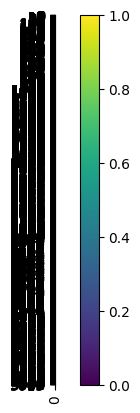

In [217]:


# Create a figure and axis
fig, ax = plt.subplots()


# Plot the data
im = ax.imshow(predictions, cmap='viridis', vmin=0, vmax=1)

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set the axis labels
ax.set_xticks(range(len(viewer.columns)))
ax.set_yticks(range(len(viewer.index)))
ax.set_xticklabels(viewer.columns)
ax.set_yticklabels(viewer.index)

# Rotate the x-axis labels for better visibility if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [218]:
count = (viewer>0.5).sum().sum()
count

100

In [219]:
testing_file = r'C:\Users\Niranjan\Desktop\BISAG\second project\testing data\test.csv'

In [220]:
test_dataset = pd.read_csv(testing_file)

In [221]:
test_data = test_dataset
test_data.describe
test_df = test_data.set_index("Date and Time")
test_df.describe

<bound method NDFrame.describe of                   Failure
Date and Time            
19-04-2022 08:00        0
19-04-2022 09:00        0
19-04-2022 10:00        0
19-04-2022 11:00        0
19-04-2022 12:00        0
...                   ...
02-06-2022 19:00        0
02-06-2022 20:00        0
02-06-2022 21:00        0
02-06-2022 22:00        0
02-06-2022 23:00        0

[1072 rows x 1 columns]>

In [222]:
test_count = (test_df==1).sum().sum()
test_count

31

In [223]:
tester = viewer.sample(n=1072)
cnt = (tester>0.5).sum().sum()
cnt

27

In [224]:
tester.describe


<bound method NDFrame.describe of              0
4679  0.003062
2493  0.002591
2331  0.002595
3695  0.920169
3872  0.004144
...        ...
4758  0.003073
749   0.002779
1738  0.002582
4071  0.003490
472   0.002738

[1072 rows x 1 columns]>

In [225]:
# Assuming you have a DataFrame called "df_tester"
# Create an empty DataFrame with the same shape as df_tester
modified = pd.DataFrame(index=tester.index, columns=tester.columns)

# Loop through each element of df_tester
for i in range(len(tester.index)):
    for j in range(len(tester.columns)):
        if tester.iloc[i, j] < 0.5:
            modified.iloc[i, j] = 0
        else:
            modified.iloc[i, j] = 1

# Print the modified DataFrame
modified


,0
4679,0
2493,0
2331,0
3695,1
3872,0
...,...
4758,0
749,0
1738,0
4071,0


In [226]:
pred = modified.copy()

In [227]:
pred.index = test_df.index

In [228]:
accuracy = (pred.squeeze()==test_df["Failure"]).mean()

In [229]:
accuracy

0.9477611940298507

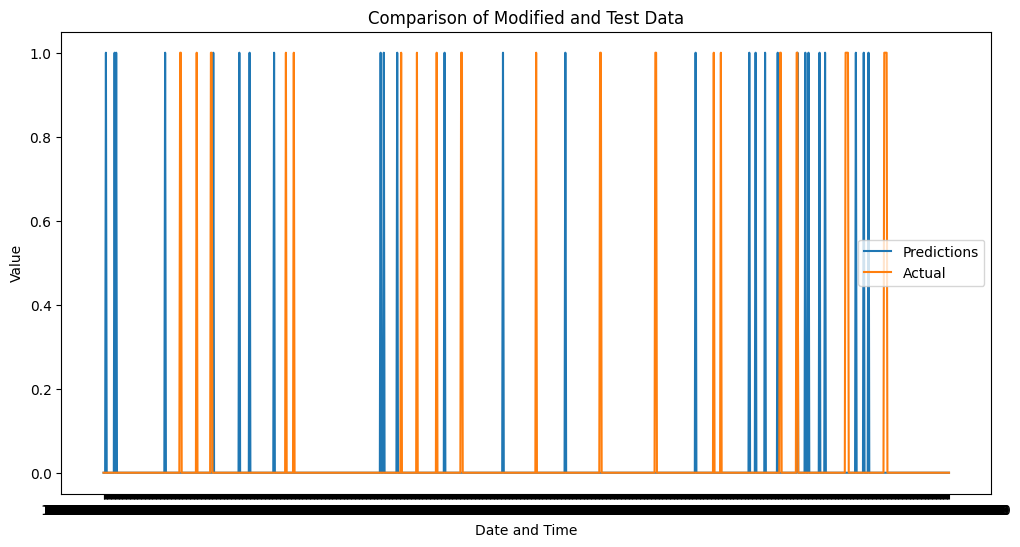

In [230]:


# Assuming you have DataFrames "modified" and "test_df"
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the modified DataFrame
plt.plot(test_df.index, pred.squeeze(), label='Predictions')

# Plot the "Failure" column in test_df
plt.plot(test_df.index, test_df['Failure'], label='Actual')

# Set the x-axis label
plt.xlabel('Date and Time')

# Set the y-axis label
plt.ylabel('Value')

# Set the plot title
plt.title('Comparison of Modified and Test Data')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [231]:
pred.to_csv(r'C:\Users\Niranjan\Desktop\BISAG\second project\testing data\12.csv',index = False)

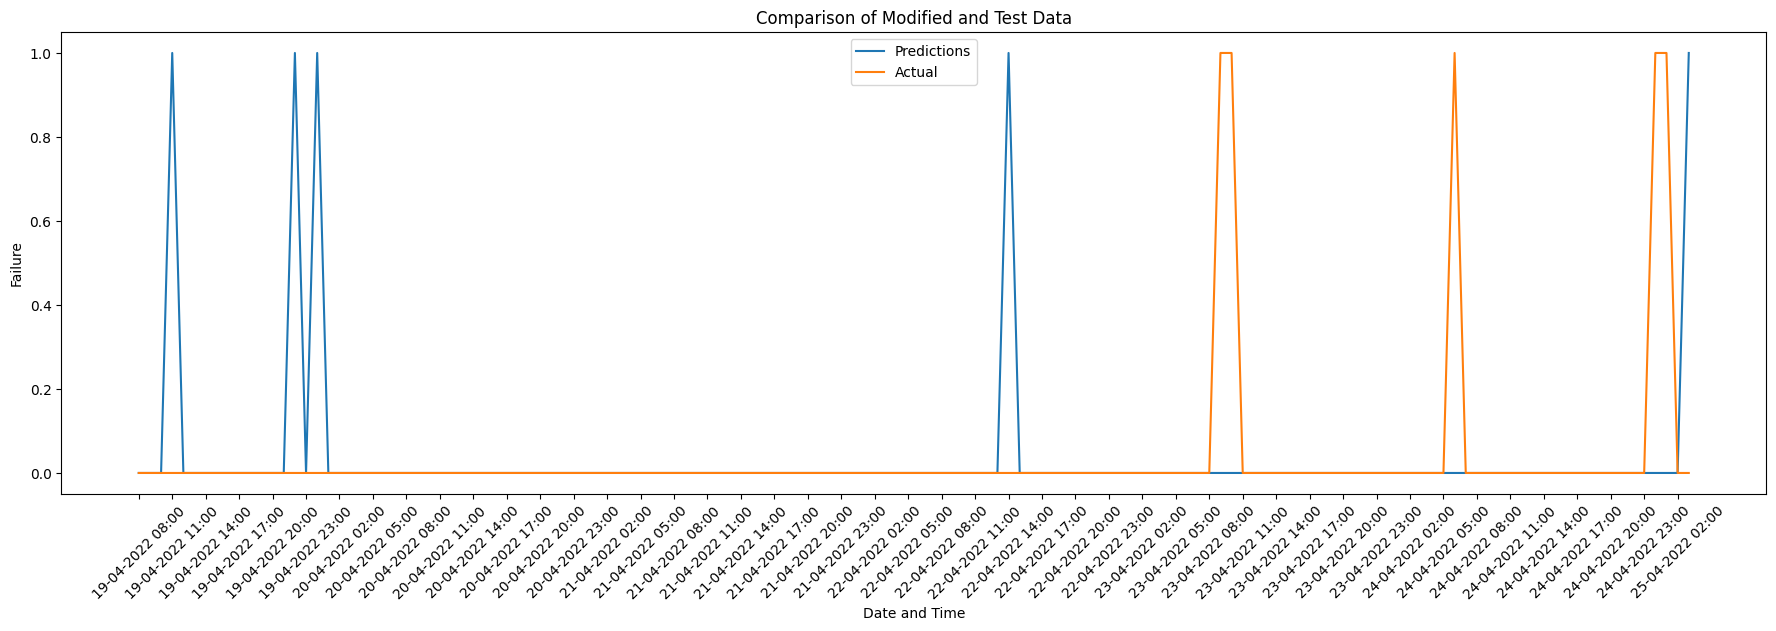

In [232]:
#For M1 divided into three parts for better visualisation

# Define the date range
start_date = '19-04-2022 08:00'
end_date = '25-04-2022 03:00'

# Filter the data for the specified date range
pred_range = pred.loc[start_date:end_date]
test_range = test_df.loc[start_date:end_date]

# Set the figure size
plt.figure(figsize=(22, 6))

# Plot the modified DataFrame
plt.plot(pred_range.index, pred_range.squeeze(), label='Predictions')

# Plot the "Failure" column in test_df
plt.plot(test_range.index, test_range['Failure'], label='Actual')

# Set the x-axis label
plt.xlabel('Date and Time')

# Set the y-axis label
plt.ylabel('Failure')

# Set the plot title
plt.title('Comparison of Modified and Test Data')

# Adjust the x-axis tick labels
plt.xticks(rotation=45)
plt.gca().set_xticks(pred_range.index[::3])  # Adjust the interval as needed
plt.gca().set_xticklabels(pred_range.index[::3])  # Adjust the date format as needed

# Add a legend
plt.legend()

# Show the plot
plt.show()


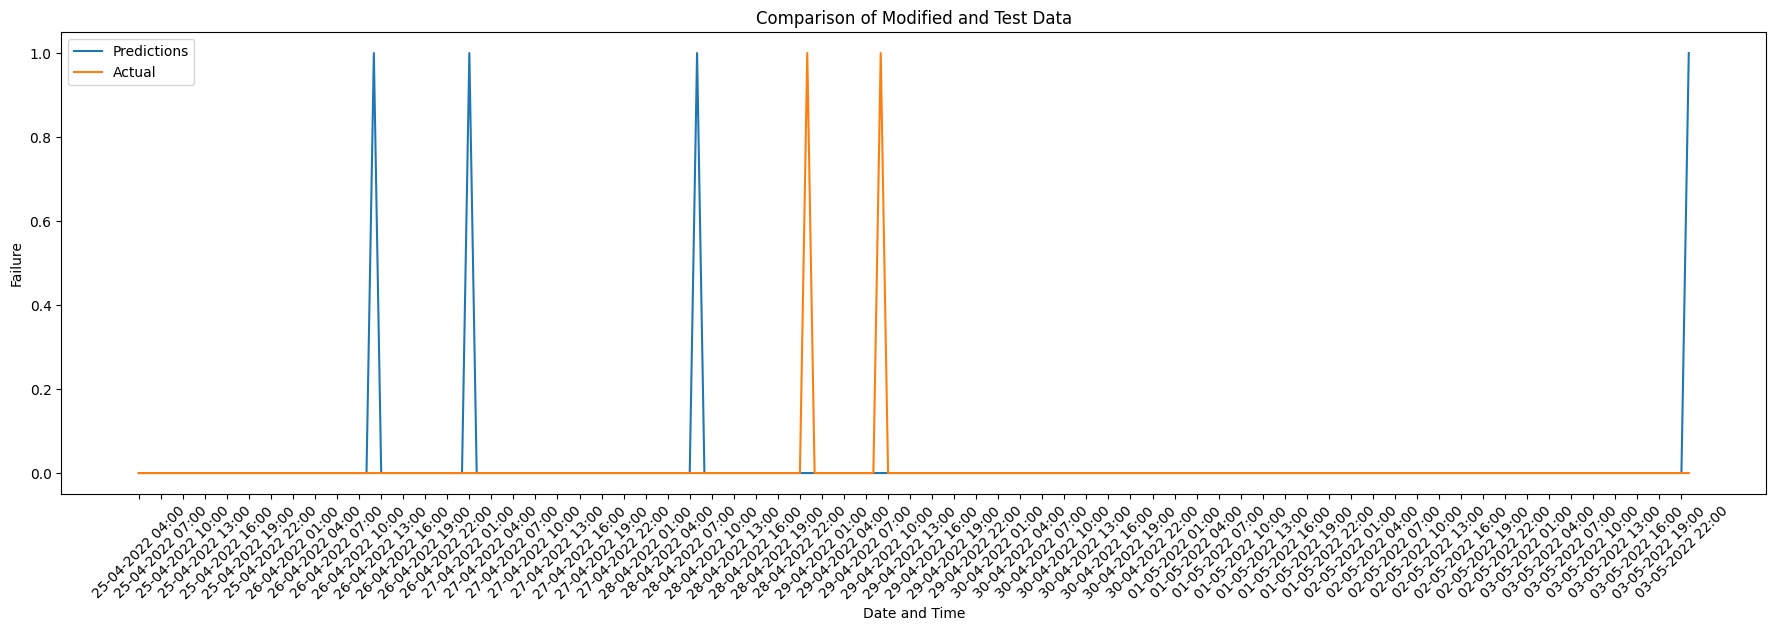

In [234]:
#For M1 part 2
# Define the date range
start_date = '25-04-2022 04:00'
end_date = '03-05-2022 23:00'

# Filter the data for the specified date range
pred_range = pred.loc[start_date:end_date]
test_range = test_df.loc[start_date:end_date]

# Set the figure size
plt.figure(figsize=(22, 6))

# Plot the modified DataFrame
plt.plot(pred_range.index, pred_range.squeeze(), label='Predictions')

# Plot the "Failure" column in test_df
plt.plot(test_range.index, test_range['Failure'], label='Actual')

# Set the x-axis label
plt.xlabel('Date and Time')

# Set the y-axis label
plt.ylabel('Failure')

# Set the plot title
plt.title('Comparison of Modified and Test Data')

# Adjust the x-axis tick labels
plt.xticks(rotation=45)
plt.gca().set_xticks(pred_range.index[::3])  # Adjust the interval as needed
plt.gca().set_xticklabels(pred_range.index[::3])  # Adjust the date format as needed

# Add a legend
plt.legend()

# Show the plot
plt.show()


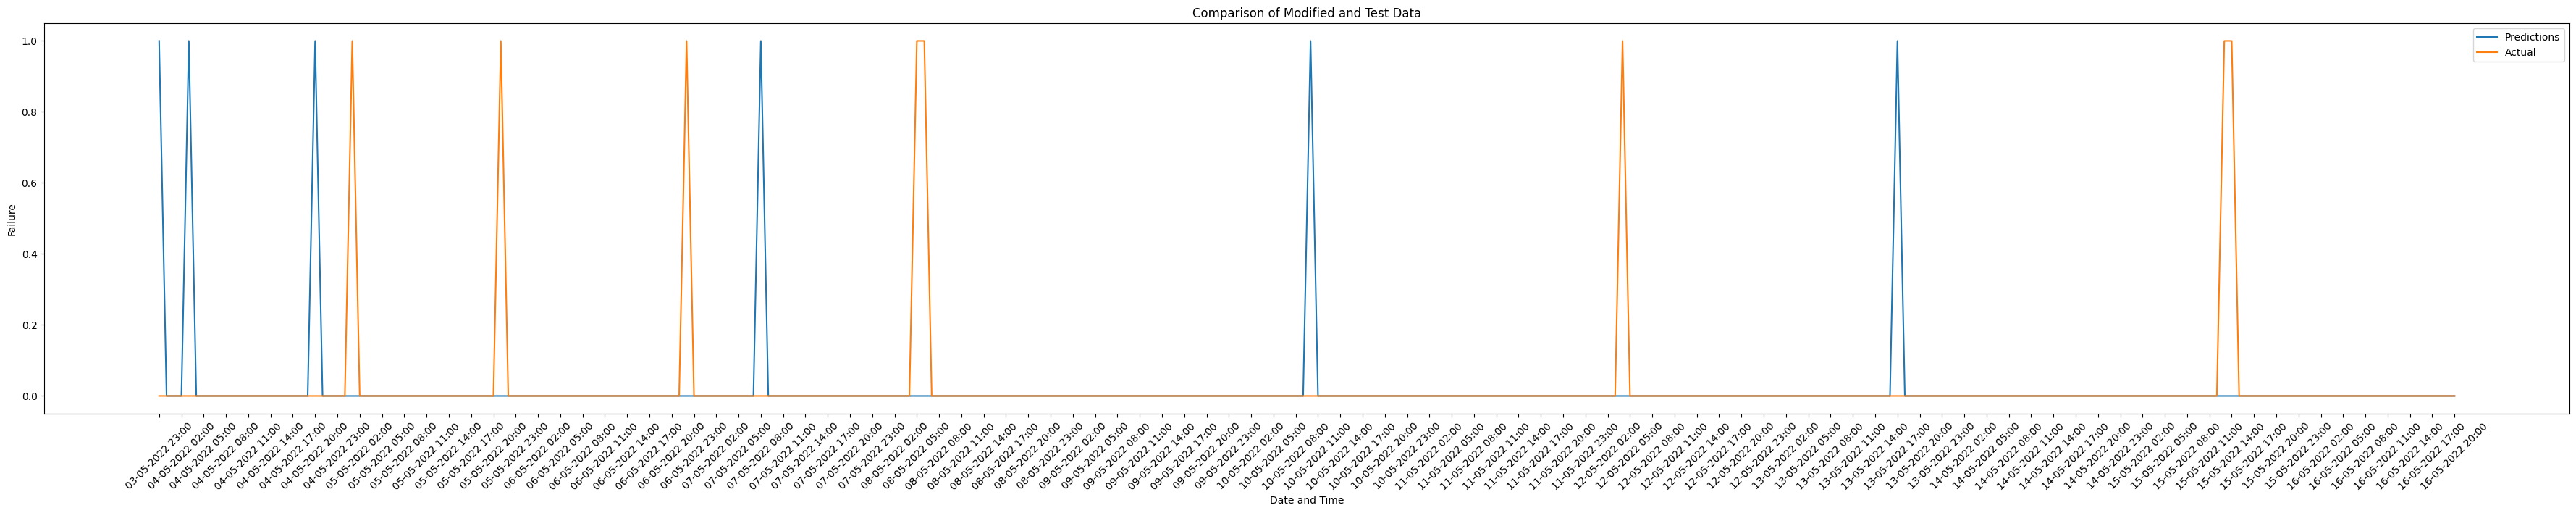

In [240]:
#For M1 last part
# Define the date range
start_date = '03-05-2022 23:00'
end_date = '16-05-2022 20:00'

# Filter the data for the specified date range
pred_range = pred.loc[start_date:end_date]
test_range = test_df.loc[start_date:end_date]

# Set the figure size
plt.figure(figsize=(45, 7))

# Plot the modified DataFrame
plt.plot(pred_range.index, pred_range.squeeze(), label='Predictions')

# Plot the "Failure" column in test_df
plt.plot(test_range.index, test_range['Failure'], label='Actual')

# Set the x-axis label
plt.xlabel('Date and Time')

# Set the y-axis label
plt.ylabel('Failure')

# Set the plot title
plt.title('Comparison of Modified and Test Data')

# Adjust the x-axis tick labels
plt.xticks(rotation=45)
plt.gca().set_xticks(pred_range.index[::3])  # Adjust the interval as needed
plt.gca().set_xticklabels(pred_range.index[::3])  # Adjust the date format as needed

# Add a legend
plt.legend()

# Show the plot
plt.show()


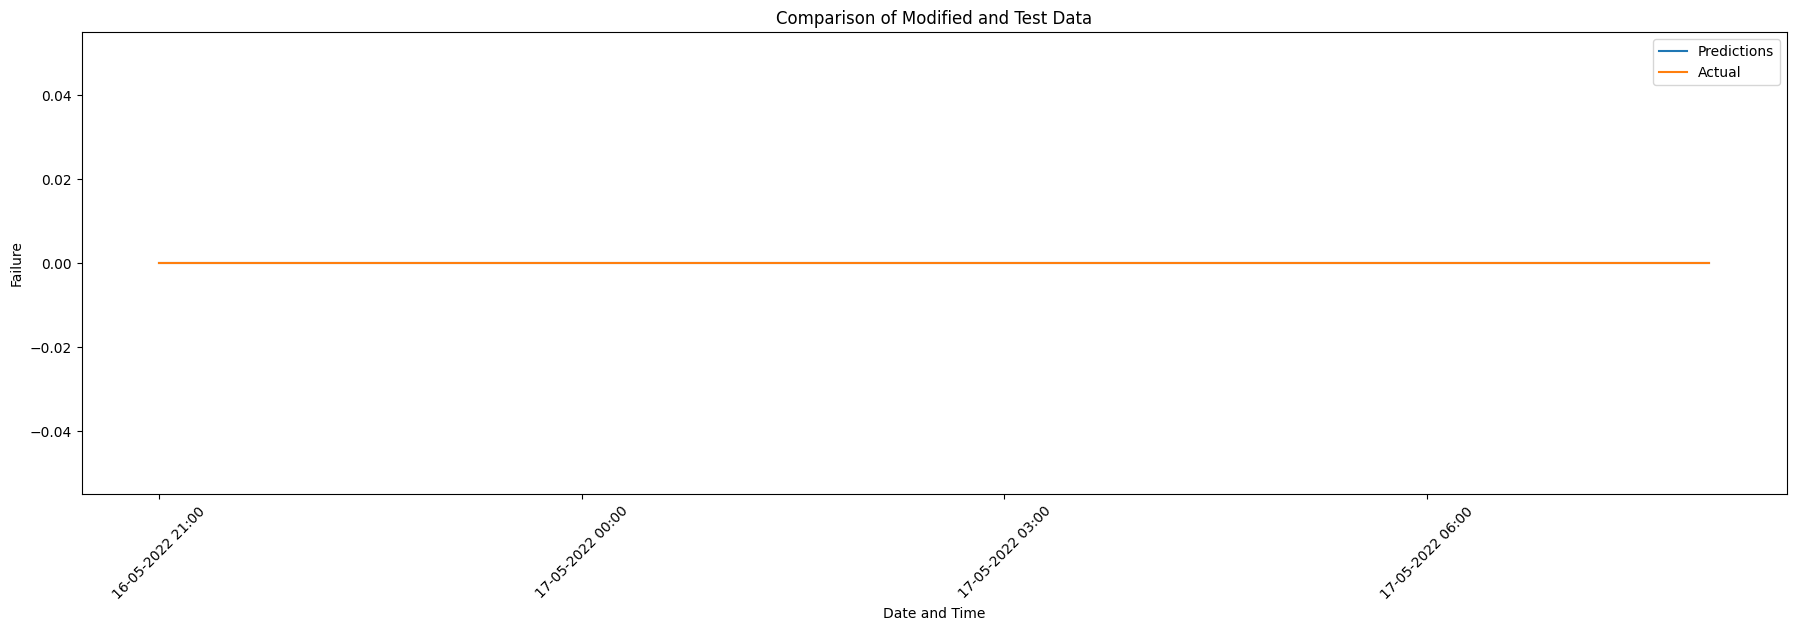

In [237]:
#For M2
# Define the date range
start_date = '16-05-2022 21:00'
end_date = '17-05-2022 08:00'

# Filter the data for the specified date range
pred_range = pred.loc[start_date:end_date]
test_range = test_df.loc[start_date:end_date]

# Set the figure size
plt.figure(figsize=(22, 6))

# Plot the modified DataFrame
plt.plot(pred_range.index, pred_range.squeeze(), label='Predictions')

# Plot the "Failure" column in test_df
plt.plot(test_range.index, test_range['Failure'], label='Actual')

# Set the x-axis label
plt.xlabel('Date and Time')

# Set the y-axis label
plt.ylabel('Failure')

# Set the plot title
plt.title('Comparison of Modified and Test Data')

# Adjust the x-axis tick labels
plt.xticks(rotation=45)
plt.gca().set_xticks(pred_range.index[::3])  # Adjust the interval as needed
plt.gca().set_xticklabels(pred_range.index[::3])  # Adjust the date format as needed

# Add a legend
plt.legend()

# Show the plot
plt.show()


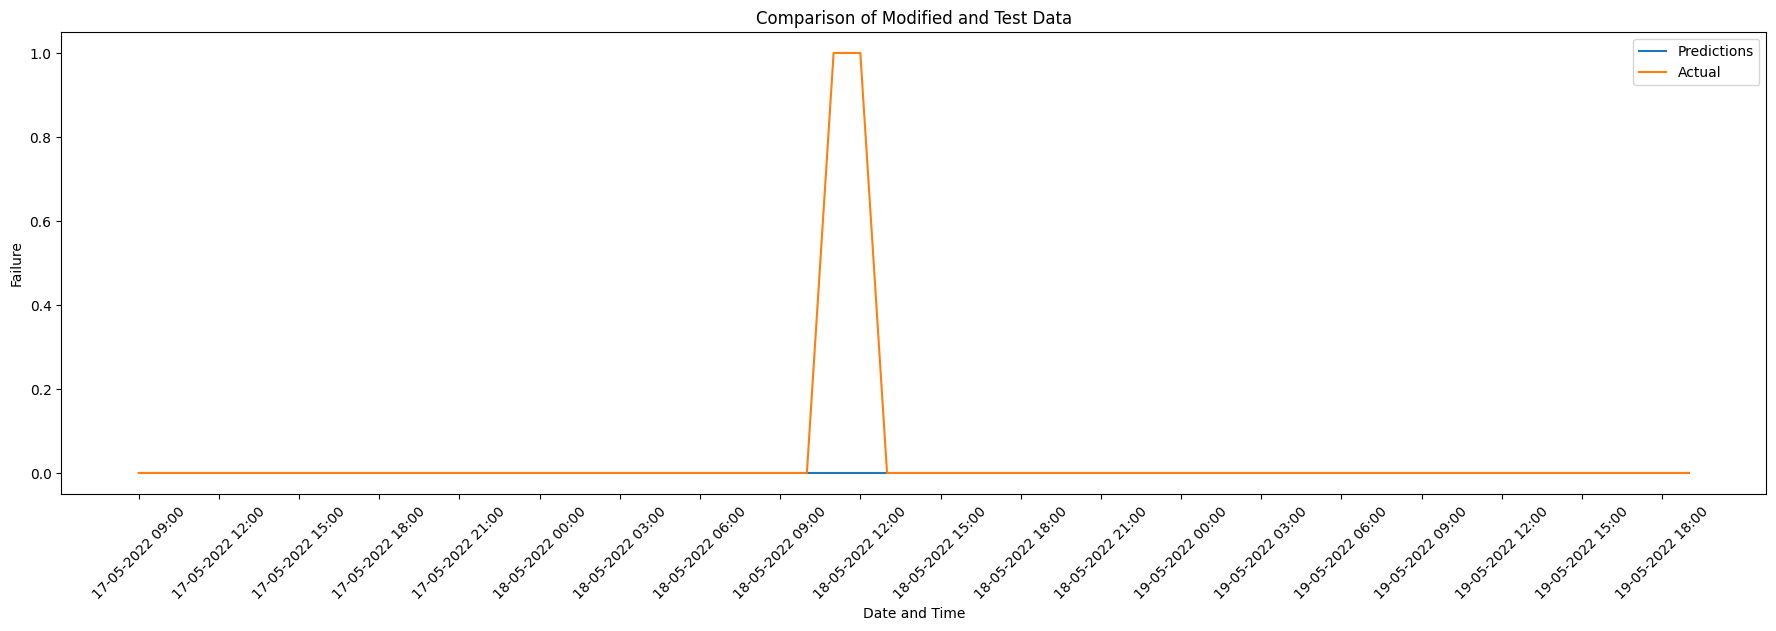

In [241]:
#For M3
# Define the date range
start_date = '17-05-2022 09:00'
end_date = '19-05-2022 19:00'

# Filter the data for the specified date range
pred_range = pred.loc[start_date:end_date]
test_range = test_df.loc[start_date:end_date]

# Set the figure size
plt.figure(figsize=(22, 6))

# Plot the modified DataFrame
plt.plot(pred_range.index, pred_range.squeeze(), label='Predictions')

# Plot the "Failure" column in test_df
plt.plot(test_range.index, test_range['Failure'], label='Actual')

# Set the x-axis label
plt.xlabel('Date and Time')

# Set the y-axis label
plt.ylabel('Failure')

# Set the plot title
plt.title('Comparison of Modified and Test Data')

# Adjust the x-axis tick labels
plt.xticks(rotation=45)
plt.gca().set_xticks(pred_range.index[::3])  # Adjust the interval as needed
plt.gca().set_xticklabels(pred_range.index[::3])  # Adjust the date format as needed

# Add a legend
plt.legend()

# Show the plot
plt.show()


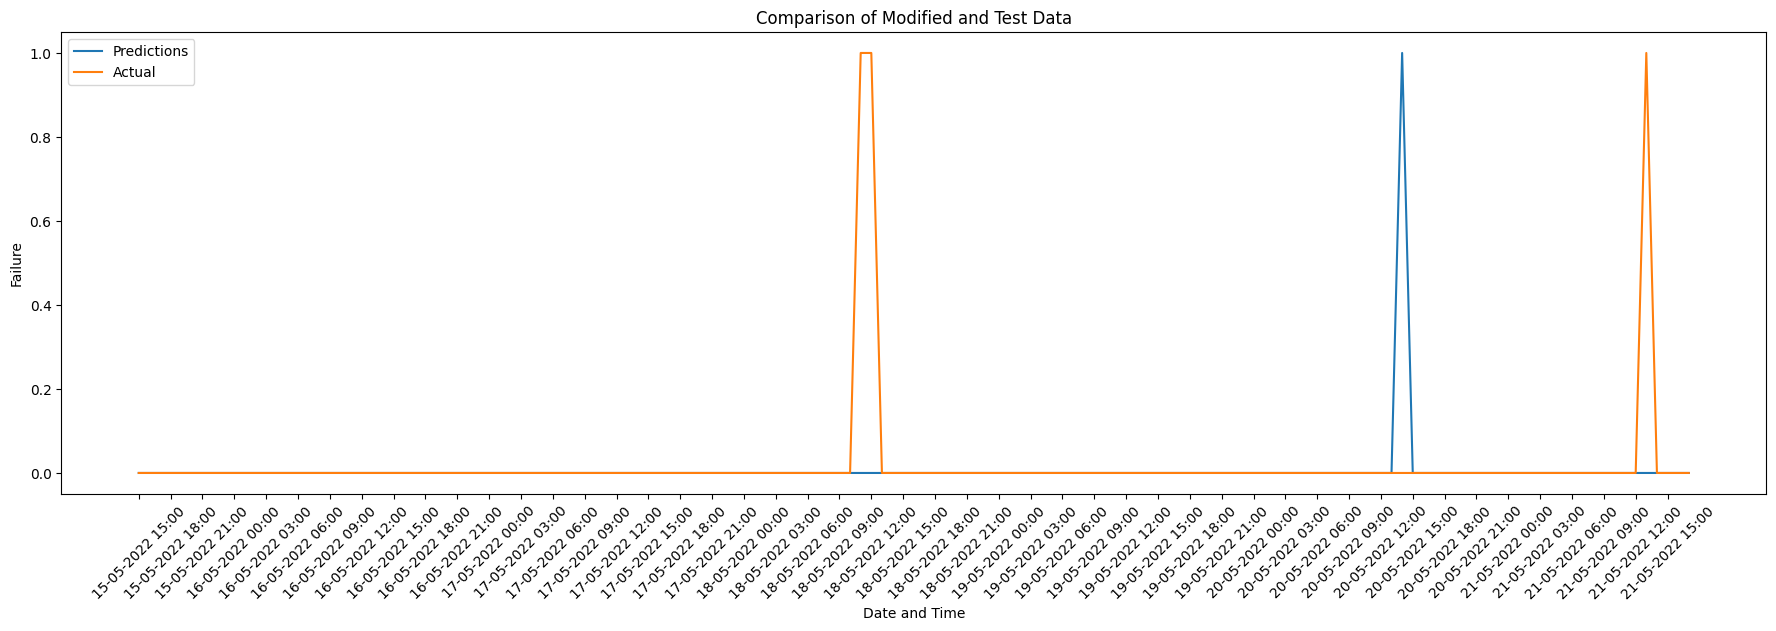

In [243]:
#For M4
# Define the date range
start_date = '15-05-2022 15:00'
end_date = '21-05-2022 17:00'

# Filter the data for the specified date range
pred_range = pred.loc[start_date:end_date]
test_range = test_df.loc[start_date:end_date]

# Set the figure size
plt.figure(figsize=(22, 6))

# Plot the modified DataFrame
plt.plot(pred_range.index, pred_range.squeeze(), label='Predictions')

# Plot the "Failure" column in test_df
plt.plot(test_range.index, test_range['Failure'], label='Actual')

# Set the x-axis label
plt.xlabel('Date and Time')

# Set the y-axis label
plt.ylabel('Failure')

# Set the plot title
plt.title('Comparison of Modified and Test Data')

# Adjust the x-axis tick labels
plt.xticks(rotation=45)
plt.gca().set_xticks(pred_range.index[::3])  # Adjust the interval as needed
plt.gca().set_xticklabels(pred_range.index[::3])  # Adjust the date format as needed

# Add a legend
plt.legend()

# Show the plot
plt.show()


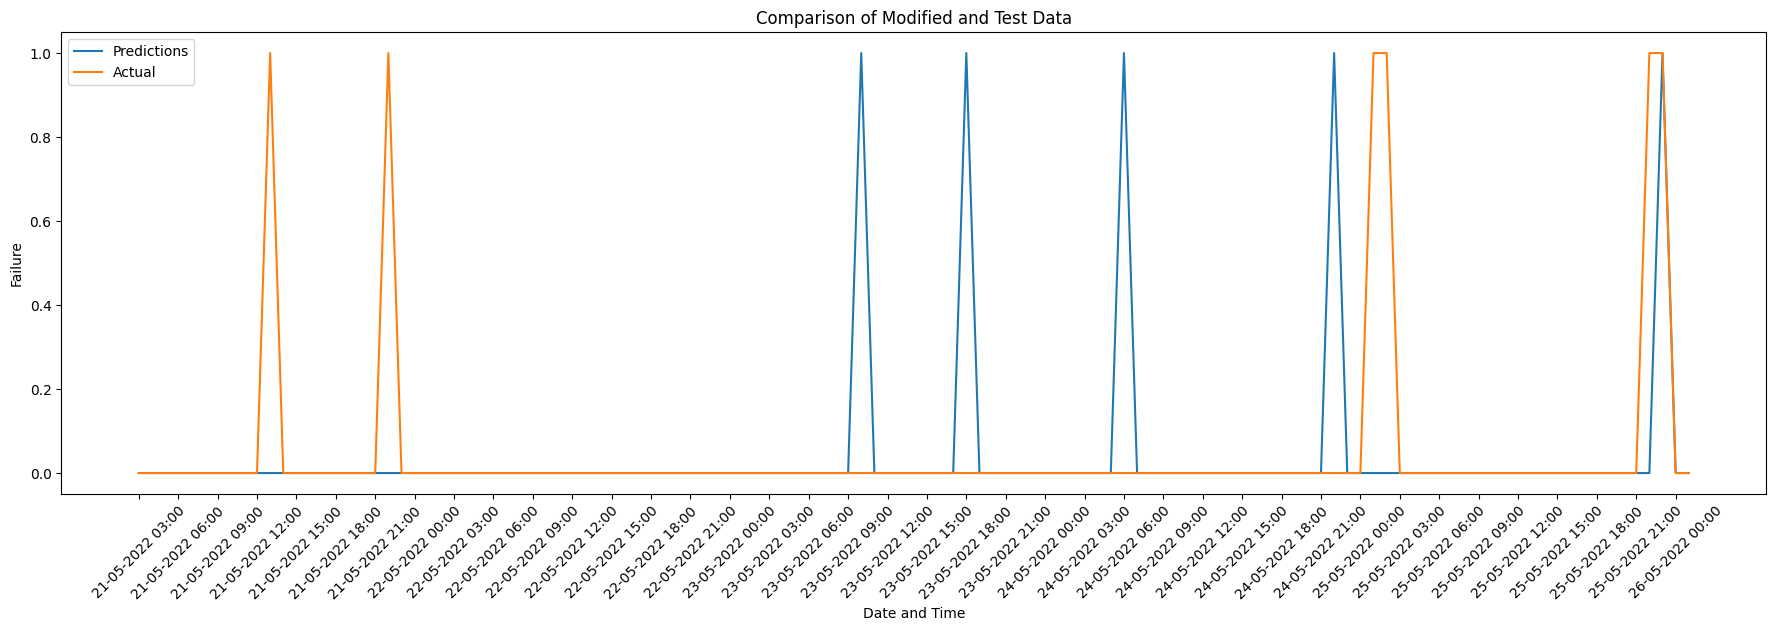

In [244]:
#For M5
# Define the date range
start_date = '21-05-2022 03:00'
end_date = '26-05-2022 01:00'

# Filter the data for the specified date range
pred_range = pred.loc[start_date:end_date]
test_range = test_df.loc[start_date:end_date]

# Set the figure size
plt.figure(figsize=(22, 6))

# Plot the modified DataFrame
plt.plot(pred_range.index, pred_range.squeeze(), label='Predictions')

# Plot the "Failure" column in test_df
plt.plot(test_range.index, test_range['Failure'], label='Actual')

# Set the x-axis label
plt.xlabel('Date and Time')

# Set the y-axis label
plt.ylabel('Failure')

# Set the plot title
plt.title('Comparison of Modified and Test Data')

# Adjust the x-axis tick labels
plt.xticks(rotation=45)
plt.gca().set_xticks(pred_range.index[::3])  # Adjust the interval as needed
plt.gca().set_xticklabels(pred_range.index[::3])  # Adjust the date format as needed

# Add a legend
plt.legend()

# Show the plot
plt.show()


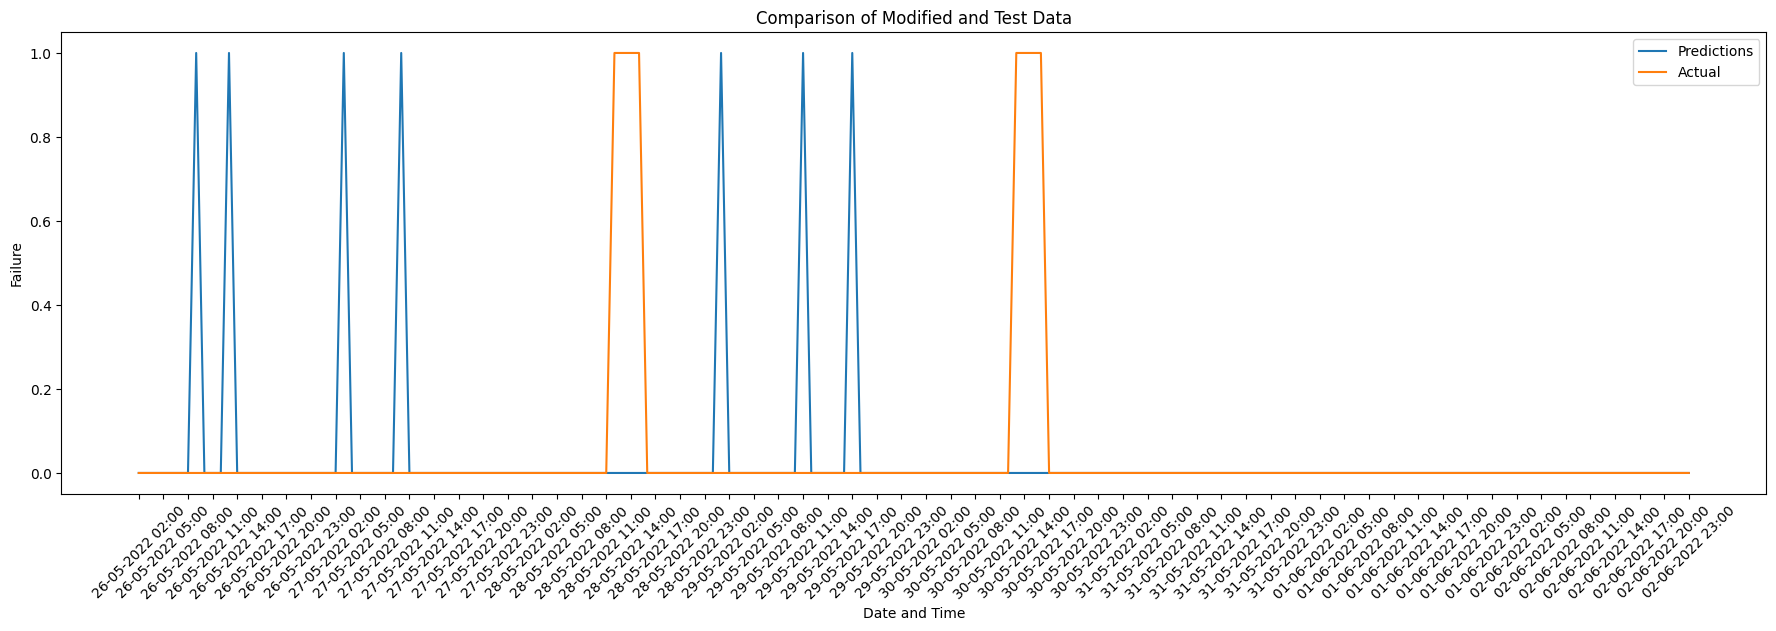

In [242]:
# Define the date range
start_date = '26-05-2022 02:00'
end_date = '02-06-2022 23:00'

# Filter the data for the specified date range
pred_range = pred.loc[start_date:end_date]
test_range = test_df.loc[start_date:end_date]

# Set the figure size
plt.figure(figsize=(22, 6))

# Plot the modified DataFrame
plt.plot(pred_range.index, pred_range.squeeze(), label='Predictions')

# Plot the "Failure" column in test_df
plt.plot(test_range.index, test_range['Failure'], label='Actual')

# Set the x-axis label
plt.xlabel('Date and Time')

# Set the y-axis label
plt.ylabel('Failure')

# Set the plot title
plt.title('Comparison of Modified and Test Data')

# Adjust the x-axis tick labels
plt.xticks(rotation=45)
plt.gca().set_xticks(pred_range.index[::3])  # Adjust the interval as needed
plt.gca().set_xticklabels(pred_range.index[::3])  # Adjust the date format as needed

# Add a legend
plt.legend()

# Show the plot
plt.show()


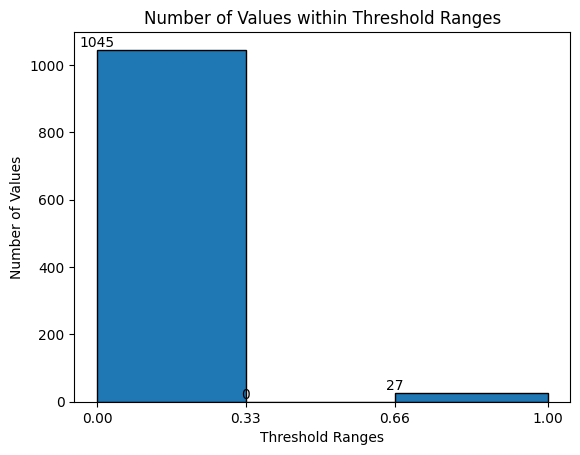

In [246]:
import matplotlib.pyplot as plt

# Define the thresholds
thresholds = [0, 0.33, 0.66, 1]

# Create the histogram
counts, bins, _ = plt.hist(tester.values.flatten(), bins=thresholds, edgecolor='black')

# Set the x-axis label
plt.xlabel('Threshold Ranges')

# Set the y-axis label
plt.ylabel('Number of Values')

# Set the plot title
plt.title('Number of Values within Threshold Ranges')

# Set the x-axis tick labels
plt.xticks(thresholds)

# Add the value labels on top of each bar
for count, bin_val in zip(counts, bins[:-1]):
    plt.text(bin_val, count, str(int(count)), ha='center', va='bottom')

# Display the plot
plt.show()
